In [24]:
# Import the necessary libraries

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
#import keras

# Helper libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from os import listdir
from os.path import join
import cv2
import pandas
import os
import random
import datetime

In [56]:
#Besoin de mettre le path absolu vers le dataset (normalement présent dans le projet)
data = "C:\\Users\\alexa\\.keras\\datasets\\flower_photos"

#METTRE UNE SEULE PHOTO DANS LE DOSSIER TEST
#SINON LE MODELE FAIT DE LA MERDE
data_test = "C:\\Users\\alexa\\Desktop\\M1\\Python\\Perso\\GitHub\\Projet_S1_M1\\test"

# List out the directories inside the main input folder

folders = os.listdir(data)
folders_test = os.listdir(data_test)
folders.remove("LICENSE.txt")
print(folders)
print(folders_test)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
['random']


In [57]:
# Import the images and resize them to a 128*128 size
# Also generate the corresponding labels

image_names = []
train_labels = []
train_images = []
validate_train_images = []
validate_train_labels = []

image_names_test = []
train_labels_test = []
train_images_test = []

size = 64,64

for folder in folders:
    for file in os.listdir(os.path.join(data,folder)):
        if file.endswith("jpg"):
            image_names.append(os.path.join(data,folder,file))
            train_labels.append(folder)
            img = cv2.imread(os.path.join(data,folder,file))
            im = cv2.resize(img,size)
            train_images.append(im)
        else:
            continue
            
for folder in folders_test:
    for file in os.listdir(os.path.join(data_test,folder)):
        if file.endswith("jpg"):
            image_names_test.append(os.path.join(data_test,folder,file))
            img = cv2.imread(os.path.join(data_test,folder,file))
            im = cv2.resize(img,size)
            train_images_test.append(im)
        else:
            continue

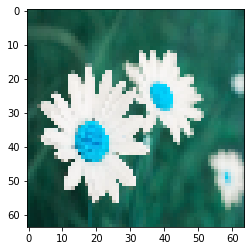

In [58]:
plt.imshow(train_images_test[0])

In [7]:
#Check if we have the correct number of photos and if the resize is correct
print(len(train_images))
print(len(train_images_test))
# Transform the image array to a numpy type and check if we have to correct data

train = np.array(train_images)
train_test = np.array(train_images_test)

print(train.shape)
print(train_test.shape)

3670
1
(3670, 64, 64, 3)
(1, 64, 64, 3)


In [103]:
# Reduce the RGB values between 0 and 1
train = train.astype('float32') / 255.0
train_test = train_test.astype('float32') / 255.0

In [85]:
# Extract the labels
label_dummies = pandas.get_dummies(train_labels)

labels =  label_dummies.values.argmax(1)

In [86]:
print(labels)

[0 0 0 ... 4 4 4]


In [87]:
print(pandas.unique(train_labels), "\n", pandas.unique(labels))

['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips'] 
 [0 1 2 3 4]


In [88]:
# Shuffle the labels and images randomly for better results
union_list = list(zip(train, labels))
random.shuffle(union_list)
train,labels = zip(*union_list)

# Convert the shuffled list to numpy array type
train = np.array(train)
labels = np.array(labels)

In [89]:
# Develop a sequential model using tensorflow keras

model = keras.Sequential([
    keras.layers.Conv2D(8,kernel_size=3,strides=2,activation='relu',padding='valid',input_shape=(64,64,3) ),
    keras.layers.Conv2D(16,kernel_size=3,strides=2,activation='relu',padding='valid' ),          
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(5, activation='softmax')
])

In [90]:
# Compute the model parameters
model.compile(optimizer='adadelta', #tf.train.AdamOptimizer()', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 31, 8)         224       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 16)        1168      
_________________________________________________________________
flatten_3 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               460928    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 645       
Total params: 462,965
Trainable params: 462,965
Non-trainable params: 0
_________________________________________________________________


In [59]:
model = keras.models.load_model("dlmodel.h5")

In [6]:
# Reload the model from the 2 files we saved
with open('model.json') as json_file:
    json_config = json_file.read()
model = keras.models.model_from_json(json_config)
model.load_weights('weights.h5')

# Note that the optimizer was not preserved.

In [26]:
print(model)

In [91]:
# Train the model  with 5 epochs 
model.fit(train,labels, validation_split=0.2, epochs=30)

Train on 2936 samples, validate on 734 samples
Epoch 1/30
2936/2936 [==============================] - 2s 644us/sample - loss: 1.6403 - accuracy: 0.1713 - val_loss: 1.6251 - val_accuracy: 0.1948
Epoch 2/30
2936/2936 [==============================] - 1s 475us/sample - loss: 1.6190 - accuracy: 0.1897 - val_loss: 1.6123 - val_accuracy: 0.2125
Epoch 3/30
2936/2936 [==============================] - 1s 451us/sample - loss: 1.6080 - accuracy: 0.2074 - val_loss: 1.6057 - val_accuracy: 0.2275
Epoch 4/30
2936/2936 [==============================] - 1s 457us/sample - loss: 1.6014 - accuracy: 0.2221 - val_loss: 1.6015 - val_accuracy: 0.2411
Epoch 5/30
2936/2936 [==============================] - 1s 456us/sample - loss: 1.5966 - accuracy: 0.2374 - val_loss: 1.5986 - val_accuracy: 0.2398
Epoch 6/30
2936/2936 [==============================] - 1s 462us/sample - loss: 1.5929 - accuracy: 0.2476 - val_loss: 1.5960 - val_accuracy: 0.2452
Epoch 7/30
2936/2936 [==============================] - 1s 461us/

In [206]:
model.save("model.h5")

In [60]:
#Get the data again
img_gen_aug=keras.preprocessing.image.ImageDataGenerator(zoom_range=0.1,
                                                     rotation_range=5,
                                                     rescale=1/255,
                                                     shear_range=5,
                                                     width_shift_range=8,
                                                     height_shift_range=8,                                    
                                                     validation_split=0.1)

img_dirit=img_gen_aug.flow_from_directory(data_test,target_size=size,
                                      class_mode="sparse",
                                      batch_size=256,
                                      subset="training",
                                      interpolation="bicubic")


Found 1 images belonging to 1 classes.


In [19]:
test_res=model.evaluate(train,labels)

3670/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [61]:
# Load the prediction from the model
vals=[next(img_dirit) for i in range(8)]
tx=np.concatenate([v[0] for v in vals])
ty=np.concatenate([v[1] for v in vals])
preds=model.predict(tx)

Predicted flower : 
Dandelion
[0.41153803 0.5367767  0.03224542 0.00423798 0.01520184]


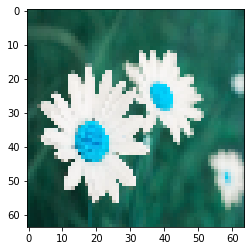

In [62]:
i = 0
plt.imshow(train_images_test[i])
a = np.argmax(preds[i])
print("Predicted flower : ")
if a == 0:
    print("Daisy")
elif a == 1:
    print("Dandelion")
elif a == 2:
    print("Rose")
elif a == 3:
    print("Sunflower")
elif a == 4:
    print("Tulip")
    
print(preds[i])

#TODO
Correct training for the model, he is very innacurate

In [63]:
with open("model.json", "w") as file:
    file.write(model.to_json())
model.save_weights("weights.h5")

In [64]:
# Reload the model from the 2 files we saved
with open('model.json') as json_file:
    json_config = json_file.read()
model = keras.models.model_from_json(json_config)
model.load_weights('weights.h5')

# Note that the optimizer was not preserved so we can't train the model anymore (or we have to do model.compile again).